In [38]:
#import packages

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# reading csv files

dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
dataset

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [40]:
#add column name

dataset.columns =['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
dataset

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [41]:
dataset['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [46]:
#LABEL ENCODING

# Assigning numerical values and storing in another column

dataset['class'] = LabelEncoder().fit_transform(dataset['class'])
dataset['class'].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

In [47]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
# Split the Dataset into Test and Training datasets 80-20 split

Train_Dataset, Test_dataset = train_test_split(dataset, test_size = 0.2)
Y_train = Train_Dataset['class'] #LABELS
X_train = Train_Dataset.drop(['class'], axis=1) # FEATURES
Y_test = Test_dataset['class']
X_test = Test_dataset.drop(['class'], axis=1)
print("X_train ,X_test ,Y_train ,Y_test :\n",X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

X_train ,X_test ,Y_train ,Y_test :
 (120, 4) (30, 4) (120,) (30,)


In [18]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1)

print("After train and validation set split for model fitting :\n X_train, Y_train, X_validation, Y_validation :",X_train.shape,Y_train.shape,X_val.shape,Y_val.shape)

After train and validation set split for model fitting :
 X_train, Y_train, X_validation, Y_validation : (97, 4) (97,) (11, 4) (11,)


In [48]:
#Feed Forward Neural Network(FFNN) model Building

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input

In [49]:
#Model Definition

model=Sequential()
model.add(Input(shape=(4,))) #INPUT LAYER
model.add(Dense(32,activation = "relu")) #HIDDEN LAYER 1
model.add(Dense(16, activation = "relu")) #HIDDEN Layer 2
model.add(Dense(3, activation = "softmax")) #Output Layer
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 739
Trainable params: 739
Non-trainable params: 0
_________________________________________________________________
None


In [50]:
#model Compilation

model.compile(optimizer = 'adam' , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
epochs = 10
batch_size = 4

#Model Training
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_val, Y_val))

Epoch 1/10
25/25 [==============================] - 2s 20ms/step - loss: 1.0357 - accuracy: 0.4227 - val_loss: 1.0917 - val_accuracy: 0.1818
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.9386 - accuracy: 0.4433 - val_loss: 0.9995 - val_accuracy: 0.5455
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.8691 - accuracy: 0.6907 - val_loss: 0.8873 - val_accuracy: 0.5455
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 0.8082 - accuracy: 0.6804 - val_loss: 0.8495 - val_accuracy: 0.5455
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 0.7558 - accuracy: 0.6907 - val_loss: 0.7736 - val_accuracy: 0.5455
Epoch 6/10
25/25 [==============================] - 0s 5ms/step - loss: 0.6914 - accuracy: 0.6907 - val_loss: 0.7141 - val_accuracy: 0.5455
Epoch 7/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6459 - accuracy: 0.6907 - val_loss: 0.6933 - val_accuracy: 0.5455
Epoch 8/10
25/25 [=

In [51]:
# Model Evaluation on Test data

test_loss,test_acc=model.evaluate(X_test,Y_test)
print("Evaluated model accuracy on test data :",test_acc)

1/1 [==============================] - 0s 33ms/step - loss: 0.5312 - accuracy: 0.6333
Evaluated model accuracy on test data : 0.6333333253860474


In [53]:
# Predict the values from the Test dataset

Y_pred = model.predict(X_test)

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)

#calculating accuracy
accuracy = (accuracy_score(Y_test, Y_pred_classes))
print('Accuracy:', accuracy)

Accuracy: 0.6333333333333333


In [54]:
#finding Confusion matrix

print("Confusion matrix\n",confusion_matrix(Y_test,Y_pred_classes))

Confusion matrix
 [[11  0  0]
 [ 0  0 11]
 [ 0  0  8]]


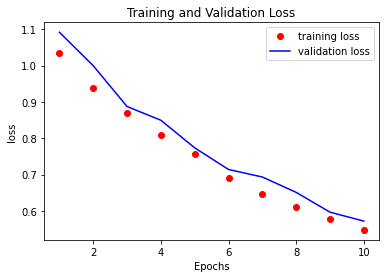

In [56]:
#Plotting curves

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

#Plotting validation loss curve

epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'o', label="training loss", color='r')
plt.plot(epochs, val_loss_values, 'b', label="validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

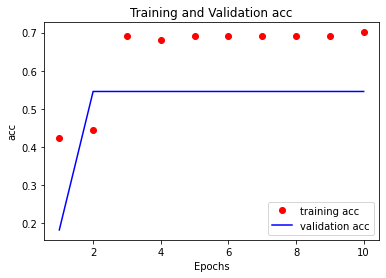

In [57]:
#Plotting validation accuracy curve

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'o', label="training acc", color = 'r')
plt.plot(epochs, val_acc_values, 'b', label="validation acc")
plt.title("Training and Validation acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()